Three Observations:

1) From looking at the Latitude vs. Temperature plot, cities closer to the equator (latitude 0), have higher maximum temperatures while cities closer to the poles (max and min latitudes) have lower maximum temperatures. 

2) From the Latitude vs. Humidity plot, there are a greater number of data points between 60% and 100% humidity, however they span between the max and min latitudes. There is also one datapoint located above the 100% humidity line, so I would classify that as an outlier. Overall, I do not see enough of a tend with this data to come to a definate conclusion.

3) The Latitude vs. Cloudiness plot is interesting because there are a noticeable amount of data points located along the 0%, 75%, and 100% Cloudiness lines. I'm not entirely sure of the factors determining cloudiness (other than just having clouds in the sky), so I'm thinking that is something I would need to discover before concluding anything, or that this data is just not as reliable since the current weather situation changes so frequently. I would however like to see cloudiness compared to wind speed since both higher wind speeds and clouds happen during specific weather patterns.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Lists to hold collected info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Sets up print record and collects data for each city
city_number = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city in cities:
    try: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        current_city = response["name"]
        print(f"Processing Record {city_number} | {current_city}")
        city_number += 1
              
    except:
        print("City not found. Skipping...")
              
    continue

print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 | Albany
Processing Record 2 | Busselton
Processing Record 3 | Vagur
Processing Record 4 | Krasnoarmeysk
Processing Record 5 | Beringovskiy
Processing Record 6 | Gorontalo
Processing Record 7 | Punta Alta
Processing Record 8 | Saint-Philippe
Processing Record 9 | Ushuaia
Processing Record 10 | Mataura
Processing Record 11 | Ancud
Processing Record 12 | Hermanus
Processing Record 13 | Port Elizabeth
Processing Record 14 | Potiskum
City not found. Skipping...
Processing Record 15 | Dasoguz
Processing Record 16 | Atuona
Processing Record 17 | Anadyr
Processing Record 18 | Chokurdakh
Processing Record 19 | Jiangyou
Processing Record 20 | Karpathos
Processing Record 21 | Yucca Valley
Processing Record 22 | College
Processing Record 23 | Gat
Processing Record 24 | Cherskiy
Processing Record 25 | Yellowknife
Processing Record 26 | Raudeberg
Processing Record 27 | Nagua
Processing Record 28 | Khatanga
Processing Record 

Processing Record 225 | Xucheng
Processing Record 226 | Ilulissat
Processing Record 227 | Xining
Processing Record 228 | Cayenne
Processing Record 229 | Cap Malheureux
Processing Record 230 | Nola
Processing Record 231 | West Bay
Processing Record 232 | Kharan
Processing Record 233 | Siilinjarvi
Processing Record 234 | Harper
Processing Record 235 | Sao Paulo de Olivenca
Processing Record 236 | Pfungstadt
Processing Record 237 | Sawtell
Processing Record 238 | Labuhan
Processing Record 239 | La Ronge
Processing Record 240 | Severodvinsk
Processing Record 241 | Sayyan
Processing Record 242 | Waingapu
Processing Record 243 | Mogadishu
Processing Record 244 | Sulya
Processing Record 245 | Victoria
Processing Record 246 | San Andres
Processing Record 247 | Dudinka
Processing Record 248 | Beberibe
Processing Record 249 | Fortuna
Processing Record 250 | Severo-Kurilsk
Processing Record 251 | Verkhniye Sergi
Processing Record 252 | Pevek
Processing Record 253 | Natal
Processing Record 254 | S

Processing Record 450 | Vila do Maio
Processing Record 451 | Aginskoye
Processing Record 452 | Leshukonskoye
City not found. Skipping...
Processing Record 453 | Honiara
Processing Record 454 | Halifax
Processing Record 455 | Araouane
Processing Record 456 | Sao Filipe
Processing Record 457 | Bumba
Processing Record 458 | George Town
Processing Record 459 | Aykhal
Processing Record 460 | Miyako
Processing Record 461 | Igarka
Processing Record 462 | Vale
Processing Record 463 | Chulym
Processing Record 464 | Coruripe
Processing Record 465 | San Jeronimo
Processing Record 466 | Nanortalik
Processing Record 467 | Okhotsk
Processing Record 468 | Gizo
Processing Record 469 | Buala
City not found. Skipping...
Processing Record 470 | Tolmezzo
Processing Record 471 | Luau
City not found. Skipping...
Processing Record 472 | Constitucion
Processing Record 473 | Kuusamo
Processing Record 474 | Gushikawa
Processing Record 475 | Egvekinot
Processing Record 476 | Ahipara
Processing Record 477 | Kisan

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
city_data_dictionary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

city_data = pd.DataFrame(city_data_dictionary)

# Make sure no missing values
print(city_data.count())

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64


In [33]:
# Display data frame
city_data['Date'] = pd.to_datetime(city_data['Date'],unit='s')
display(city_data.head())

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,40,US,2019-06-26 17:02:29,48,42.65,-73.75,84.99,3.36
1,Busselton,17,AU,2019-06-26 17:03:30,51,-33.64,115.35,57.00,32.44
2,Vagur,78,FO,2019-06-26 17:03:30,90,61.47,-6.81,50.31,22.57
3,Krasnoarmeysk,100,RU,2019-06-26 17:03:31,93,56.12,38.15,61.00,4.47
4,Beringovskiy,100,RU,2019-06-26 17:03:31,96,63.05,179.32,42.03,7.85


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

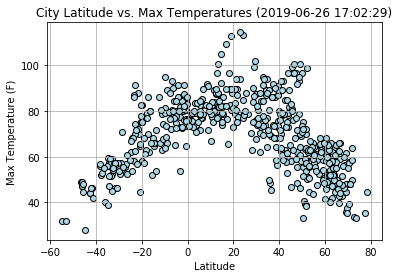

In [34]:
x_axis = lat
y_axis = max_temp
lat_vs_temp = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperatures ({city_data.at[0, 'Date']})")
plt.grid()

# display(lat_vs_temp)

plt.savefig('lat-vs-temp.png')

#### Latitude vs. Humidity Plot

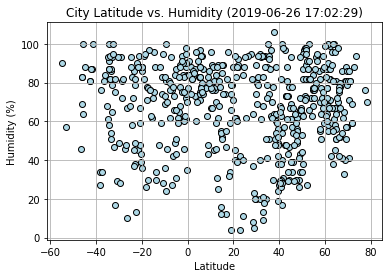

In [35]:
x_axis = lat
y_axis = humidity
lat_vs_humidity = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({city_data.at[0, 'Date']})")
plt.grid()

# display(lat_vs_humidity)

plt.savefig('lat-vs-humidity.png')

#### Latitude vs. Cloudiness Plot

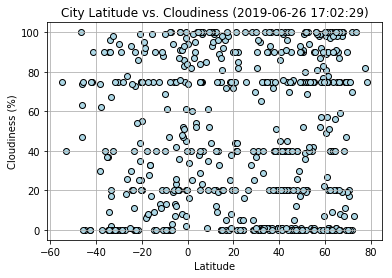

In [36]:
x_axis = lat
y_axis = cloudiness
lat_vs_cloudiness = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({city_data.at[0, 'Date']})")
plt.grid()

# display(lat_vs_cloudiness)

plt.savefig('lat-vs-cloudiness.png')

#### Latitude vs. Wind Speed Plot

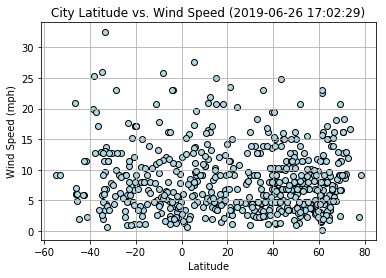

In [37]:
x_axis = lat
y_axis = wind_speed
lat_vs_wind = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({city_data.at[0, 'Date']})")
plt.grid()

# display(lat_vs_temp)

plt.savefig('lat-vs-wind.png')